# Background

This notebook contains some background information: results from the literature as it exists now, along with some predictions.

In [1]:
# generic imports for rest of notebook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy
import sys
sys.path.append('..')
import sfp

%load_ext autoreload
%autoreload 2

Failed to import duecredit due to No module named 'duecredit'


## Existing literature

The following code summarizes the results I found in the papers cited at the end of this block, as well as from a model created by Noah Benson from pilot data that Catherine Olsson had gatherd (both members of the Winawer lab; see [next section](#Olsson-/-Benson-model) for details of the model). The data from the following papers was summarized by hand and is presented in the following figure as a summary.

- Sasaki, Y., Hadjikhani, N., Fischl, B., Liu, A. K., Marret, S., Dale, A. M., & Tootell, R. B. (2001). Local and global attention are mapped retinotopically in human occipital cortex. Proceedings of the National Academy of Sciences, 98(4), 2077–2082.

- Henriksson, L., Nurminen, L., Hyv\"arinen, Aapo, & Vanni, S. (2008). Spatial frequency tuning in human retinotopic visual areas. Journal of Vision, 8(10), 5. http://dx.doi.org/10.1167/8.10.5

- Kay, K. N., Naselaris, T., Prenger, R. J., & Gallant, J. L. (2008). Identifying Natural Images From Human Brain Activity. Nature, 452(7185), 352–355. http://dx.doi.org/10.1038/nature06713

- Hess, R. F., Li, X., Mansouri, B., Thompson, B., & Hansen, B. C. (2009). Selectivity as well as sensitivity loss characterizes the cortical spatial frequency deficit in amblyopia. Human Brain Mapping, 30(12), 4054–4069. http://dx.doi.org/10.1002/hbm.20829

- Kay, K. N. (2011). Understanding Visual Representation By Developing Receptive-Field Models. Visual Population Codes: Towards a Common Multivariate Framework for Cell Recording and Functional Imaging, (), 133–162.

- D'Souza, D. V., Auer, T., Frahm, J., Strasburger, H., & Lee, B. B. (2016). Dependence of chromatic responses in v1 on visual field eccentricity and spatial frequency: an fmri study. JOSA A, 33(3), 53–64.

- Farivar, R., Clavagnier, S., Hansen, B. C., Thompson, B., & Hess, R. F. (2017). Non-uniform phase sensitivity in spatial frequency maps of the human visual cortex. The Journal of Physiology, 595(4), 1351–1363. http://dx.doi.org/10.1113/jp273206

This function creates the df summarizing the above studies

In [2]:
df = sfp.figures.existing_studies_df()

We can visualize this data as showing the preferred spatial frequency (which is what these studies measure -- note that the y-axis is log-scaled)

/users-lcv/broderick/miniconda3/envs/sfp/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
../sfp/figures.py:385: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  g.ax.set_ylim((0, 11))


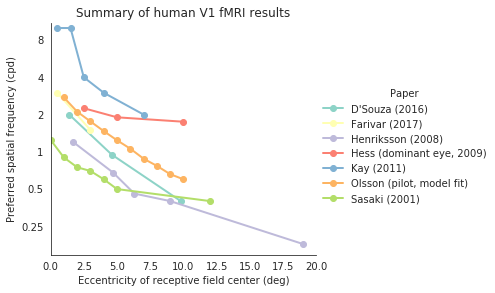

In [5]:
with sns.axes_style('white'):
    g = sfp.figures.existing_studies_figure(df, 'Preferred spatial frequency (cpd)')

However, in this project we'll generally visualize this information as preferred period, which is the inverse of preferred spatial frequency. This makes it clearer to see if the studies found results consistent with scaling hypotheses.

/users-lcv/broderick/miniconda3/envs/sfp/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


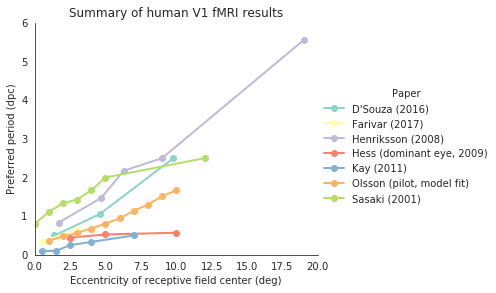

In [6]:
with sns.axes_style('white'):
    g = sfp.figures.existing_studies_figure(df)

## Olsson / Benson model

Noah Benson created this model based on pilot data that Catherine Olsson had gathered and it showed up in his VSS 2017 presentation about the Standard Cortical Observer model. It's a log-Gaussian fit to data not shown here.

For eccentricity 1.0, peak sensitivity at frequency 2.7474747474747474
For eccentricity 2.0, peak sensitivity at frequency 2.1085858585858586
For eccentricity 3.0, peak sensitivity at frequency 1.7601010101010102
For eccentricity 4.0, peak sensitivity at frequency 1.4696969696969697
For eccentricity 5.0, peak sensitivity at frequency 1.2373737373737375
For eccentricity 6.0, peak sensitivity at frequency 1.0631313131313131
For eccentricity 7.0, peak sensitivity at frequency 0.8888888888888888
For eccentricity 8.0, peak sensitivity at frequency 0.7727272727272727
For eccentricity 9.0, peak sensitivity at frequency 0.6565656565656566
For eccentricity 10.0, peak sensitivity at frequency 0.5984848484848485


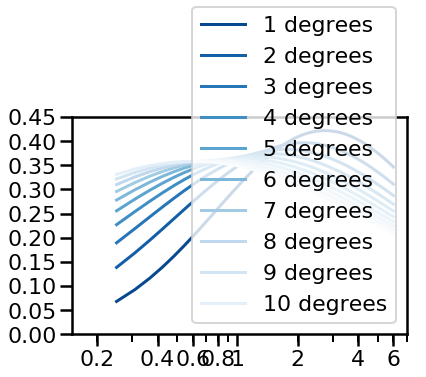

In [4]:
c = [2.52529, 1.57448, .453992, .252451, .293989]
freqs = np.linspace(.25, 6, 100)
ecc = np.linspace(1,10, 10)
sensitivity = []
for r in ecc:
    sensitivity.append(c[0]/freqs * np.exp(-.5 * ((np.log(freqs)-(c[1]+r**c[2]))/(c[3]+r**c[4]))**2))
    print("For eccentricity %s, peak sensitivity at frequency %s"%(r, freqs[np.argmax(sensitivity[-1])]))
sensitivity = np.array(sensitivity)

with sns.plotting_context("poster"):
    pal = sns.palettes.color_palette('Blues_r', 10)
    fig, ax = plt.subplots()
    for i, d in enumerate(sensitivity):
        ax.semilogx(freqs, d, color=pal[i], label='%s degrees' % (i+1))
    freq_floor = .75
    # ax.plot([freq_floor, freq_floor], [.1, .45], 'k--')
    # ax.plot([4*freq_floor, 4*freq_floor], [.1, .45], 'k--')
    ax.set_xlim((.15, 7))
    ax.set_ylim((0, .45))
    plt.legend(loc='lower right')
    _=plt.xticks([.2, .4, .6, .8, 1, 2, 4, 6,], [.2, .4, .6, .8, 1, 2, 4, 6,])

# pRF Size

There's a csv with the line fits for pRF size in different areas (from the [HCP retinotopy data](https://www.biorxiv.org/content/early/2018/04/25/308247)) on Acadia.

From Noah on how to use: "the error slope is the slope of the line-fit (with offset held at 0) to the abs(err) where err is the original prf size data minus the line-fit. So I would plot it as:
 
 (line) y = m*x + b
 
 (upper-bound) y1 = (m + e/2)*x + b
 
 (lower-bound) y2 = (m - e/2)*x + b"

In [6]:
# allfits is fit to all subjects (instead of aggfits, where it's fit to the averaged subject)
df = pd.read_csv("/mnt/Acadia/Projects/HCP/analysis/prf_images/allfits.csv")

df

,Area,Slope,Offset,SlopeSEM,N,ErrorSlope,R,G,B
0,V1,0.063485,0.100698,0.000209,486199,0.052780,0.666667,0.000000,0.000000
1,V2,0.108907,0.108278,0.000275,384987,0.068931,0.000000,0.666667,0.000000
2,V3,0.197304,0.057597,0.000386,311153,0.082598,0.000000,0.000000,0.666667
3,hV4,0.355617,0.068923,0.000639,151671,0.091381,0.000000,0.666667,0.666667
4,VO1,0.330104,0.622123,0.001529,68760,0.109036,0.666667,0.000000,0.666667
5,VO2,0.419417,0.700092,0.002361,41079,0.153230,0.666667,0.666667,0.000000
6,MST,0.505159,1.799294,0.010187,10366,0.310400,0.600000,0.400000,0.200000
7,hMT,0.412860,1.206508,0.002764,69480,0.185234,1.000000,1.000000,0.333333
8,LO2,0.514452,0.545430,0.001992,81400,0.211287,0.333333,0.333333,1.000000
9,LO1,0.425696,0.229442,0.001306,170081,0.204467,1.000000,0.500000,0.500000


/home/billbrod/miniconda3/envs/sfp/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


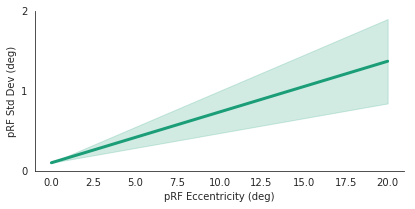

In [8]:
def plot_line(m, b, x=np.linspace(0, 12, 200), **kwargs):
    data = kwargs.pop('data')
    plt.plot(x, data[m].values*x + data[b].values, **kwargs)
    
def plot_error(m, b, e, x=np.linspace(0, 12, 200), alpha=.2, **kwargs):
    data = kwargs.pop('data')
    plt.fill_between(x, (data[m].values+data[e].values/2.)*x + data[b].values, (data[m].values-data[e].values/2.)*x + data[b].values, alpha=alpha, **kwargs)

with sns.axes_style('white'):#, sns.plotting_context('poster', font_scale=2.5):
    g = sns.FacetGrid(df[df.Area.isin(['V1'])], hue='Area', size=3, aspect=2, palette='Dark2')
    g.map_dataframe(plot_error, 'Slope', 'Offset', 'ErrorSlope', x=np.linspace(0, 20, 200),)
    g.map_dataframe(plot_line, 'Slope', 'Offset', x=np.linspace(0, 20, 200), linewidth=3)
    g.set_ylabels("pRF Std Dev (deg)")
    g.set_xlabels("pRF Eccentricity (deg)")
    g.set(yticks=[0,1,2])

# Extreme possibilities

There are two extreme possible answers to the question: "How do spatial frequency preferences change with eccentricity?" You could imagine that either they don't change at all or that they scale *exactly* with eccentricity. We'll call these two possibilities **constant** and **scaling**. Note that neither can be exactly correct: the constant one seems incredibly unlikely given the earlier results and what we know about the visual system (cortical magnification, etc.), but scaling can't be exactly true either, since at the very least something different must be happening at the fovea.

The values plotted below for scaling come directly from the pRF size data shown above (that is, the green line below is the reciprocal of the one above).

On the left we show the data as preferred spatial frequency, as at the top of this notebook. On the right we show the reciprocal of this, the preferred period, since the scaling hypothesis predicts a straight line through the origin in preferred period, which is much easier to see by eye than a hyperbola is.

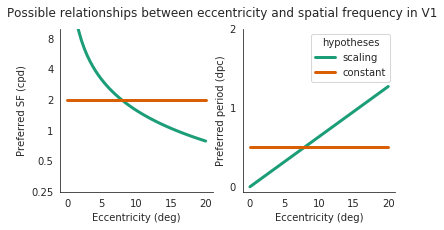

In [10]:
ecc = np.linspace(.01, 20, 50)
V1_pRF_size = 0.063485 * ecc #+0.100698
constant_hyp = 2*np.ones(len(ecc))
pal = sns.color_palette('Dark2', n_colors=2)

with sns.axes_style('white'):
    fig, axes = plt.subplots(1,2, figsize=(6,3))
    for i, ax in enumerate(axes.flatten()):
        if i==0:
            ax.semilogy(ecc, 1./V1_pRF_size, '-', label='scaling', linewidth=3, basey=2, c=pal[0])
            ax.set_ylim((.25, 10))
            ax.set_ylabel("Preferred SF (cpd)")
            ax.yaxis.set_major_formatter(ticker.FuncFormatter(sfp.plotting.myLogFormat))
            ax.plot(ecc, constant_hyp, c=pal[1], linewidth=3)# label='constant')
        elif i==1:
            ax.plot(ecc, V1_pRF_size, linewidth=3, label='scaling', c=pal[0])
            ax.set_ylabel("Preferred period (deg)")
            ax.plot(ecc, 1./constant_hyp, c=pal[1], linewidth=3, label='constant')
            ax.set_yticks([0, 1, 2])
        ax.set_xlabel("Eccentricity (deg)")
    fig.suptitle("Possible relationships between eccentricity and spatial frequency in V1")

    sns.despine()

    plt.legend(title="hypotheses", loc='best')

Based on previous results, we think the true situation is closer to scaling and, in that case, conventional full-field gratings are very inefficient. In the following plots, a black dashed line represents a single stimulus, of either the conventional or scaled type. Since conventional stimuli have the same frequency everywhere, you'll be showing high frequencies to the periphery and low frequencies to the fovea, neither of which will drive responses much. Instead, we show people scaled stimuli, whose spatial frequency drops off exactly as the inverse of eccentricity. We create several many of these, corresponding to dashed lines with different slopes.

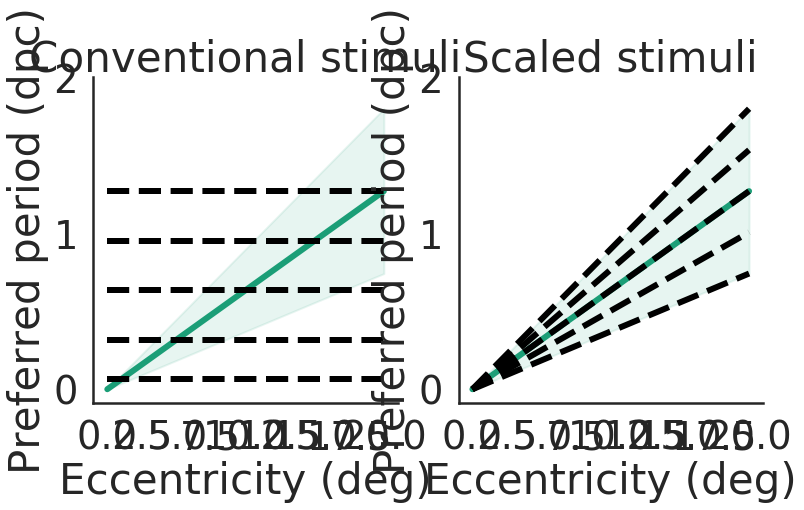

In [13]:
ecc = np.linspace(.01, 20, 50)
# from Eero, this is about what it should be
V1_RF_size = .2*ecc
V1_pRF_size_slope = 0.063485
V1_pRF_size_offset = 0#.100698
V1_pRF_size_error = 0.052780
pal = sns.color_palette('Dark2', n_colors=2)
with sns.plotting_context('poster', font_scale=1.75), sns.axes_style('white'):

    x = np.linspace(.01, 20, 50)
    y = []
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    for i, ax in enumerate(axes.flatten()):
        ax.fill_between(ecc, (V1_pRF_size_slope - V1_pRF_size_error/2.)*ecc + V1_pRF_size_offset, (V1_pRF_size_slope + V1_pRF_size_error/2.)*ecc + V1_pRF_size_offset, alpha=.1, color=pal[0])
        ax.plot(ecc, V1_pRF_size_slope*ecc+V1_pRF_size_offset, linewidth=6, label='scaling', c=pal[0])
        if i==0:
            for e in [1,5,10,15,20]:
                ax.plot([0, 20], [V1_pRF_size_slope*e+V1_pRF_size_offset, V1_pRF_size_slope*e+V1_pRF_size_offset], '--', c='k', linewidth=6)
            ax.set_title("Conventional stimuli")
        if i==1:
            for j in [-1, -.5, 0, .5, 1]:
                ax.plot(ecc, (V1_pRF_size_slope + j*V1_pRF_size_error/2.)*ecc + V1_pRF_size_offset, '--', c='k', linewidth=6)
            ax.set_title("Scaled stimuli")
        ax.set_yticks([0, 1, 2])
        ax.set_xlabel("Eccentricity (deg)")
        ax.set_ylabel("Preferred period (deg)")

    sns.despine()

We describe each of our stimuli as having a **base frequency**: this corresponds to the slope in the plot above. In addition to plotting our response as a functio of local spatial frequency, we can also plot it versus the base frequency. The basic prediction then is that each voxel's tuning curve will be identical with respect to the base frequency (that is, each voxel across eccentricities in a given visual area will respond identically to one of our stimuli), because the rate at which our stimuli's local spatial frequencies change is identical to the rate at which the voxel's spatial frequency preferences change.

This is the basic hypothesis around which we set up our experiment, and we are looking for the deviations from this hypothesis that will inevitably arise (maybe the scaling of the spatial frequencies isn't quite correct or there's a ceiling).

This first plot shows the situation if the constant hypothesis is correct: voxels at different eccentricities have the same response as a function of local spatial frequency.

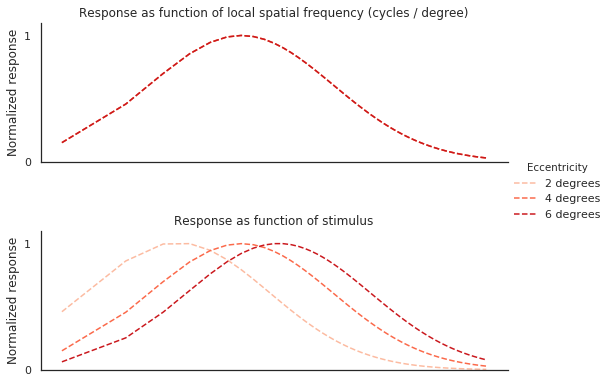

In [14]:
with sns.plotting_context('notebook'), sns.axes_style('white'):
    x = np.array(range(1,101))/3.5
    sig1 = [sfp.tuning_curves.log_norm_pdf(x, 1, 2, 1)] * 3
    sig2 = [sfp.tuning_curves.log_norm_pdf(x, 1, i+1, 1) for i in range(3)]
    ecc = ['2 degrees'] * len(x) + ['4 degrees'] * len(x) + ['6 degrees'] * len(x)
    resp_type = ['sf'] * len(ecc) + ['stim'] * len(ecc)
    df = pd.DataFrame({'sf': np.tile(x, 6), 'sig': np.array(sig1+sig2).flatten(), 'Eccentricity': ecc*2, 'resp_type': resp_type})
    df['norm_sig'] = df.groupby(['resp_type', 'Eccentricity']).sig.apply(lambda x: x/x.max())
    g = sns.FacetGrid(df, row='resp_type', hue='Eccentricity', palette='Reds', sharex=False, aspect=2.5)
    g.map(plt.semilogx, 'sf', 'norm_sig', basex=2, linestyle='--')
    g.add_legend()
    for i, ax in enumerate(g.axes.flatten()):
        if i==0:
            ax.set_title('Response as function of local spatial frequency (cycles / degree)')
        if i==1:
            ax.set_title('Response as function of stimulus')
        ax.xaxis.set_visible(False)
        ax.set_yticks([0, 1])
        ax.set_ylabel('Normalized response')
        ax.set_ylim((0, 1.1))
    plt.subplots_adjust(hspace=.5)
#    fig.savefig('constant_prediction.svg')

This shows the predictions of the scaling hypotehsis: different voxels have the same response as a function of the stimulus / base frequency, because they've been constructed to exactly counteract the difference in spatial frequency preferences as a function of eccentricity.

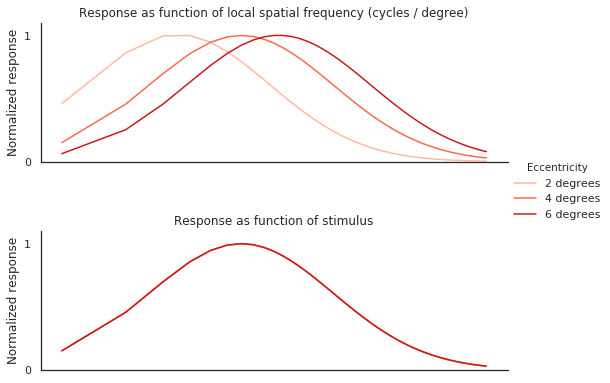

In [15]:
with sns.plotting_context('notebook'), sns.axes_style('white'):
    x = np.array(range(1,101))/3.5
    sig1 = [sfp.tuning_curves.log_norm_pdf(x, 1, 2, 1)] * 3
    sig2 = [sfp.tuning_curves.log_norm_pdf(x, 1, i+1, 1) for i in range(3)]
    ecc = ['2 degrees'] * len(x) + ['4 degrees'] * len(x) + ['6 degrees'] * len(x)
    resp_type = ['sf'] * len(ecc) + ['stim'] * len(ecc)
    df = pd.DataFrame({'sf': np.tile(x, 6), 'sig': np.array(sig2+sig1).flatten(), 'Eccentricity': ecc*2, 'resp_type': resp_type})
    df['norm_sig'] = df.groupby(['resp_type', 'Eccentricity']).sig.apply(lambda x: x/x.max())
    g = sns.FacetGrid(df, row='resp_type', hue='Eccentricity', palette='Reds', sharex=False, aspect=2.5)
    g.map(plt.semilogx, 'sf', 'norm_sig', basex=2)
    g.add_legend()
    for i, ax in enumerate(g.axes.flatten()):
        if i==0:
            ax.set_title('Response as function of local spatial frequency (cycles / degree)')
        if i==1:
            ax.set_title('Response as function of stimulus')
        ax.xaxis.set_visible(False)
        ax.set_yticks([0, 1])
        ax.set_ylabel('Normalized response')
        ax.set_ylim((0, 1.1))
    plt.subplots_adjust(hspace=.5)
#    fig.savefig('constant_prediction.svg')

# Spatial frequency examples

This section contains some examples of breaking down an image into different frequency bands, in order to show what that looks like.

In [29]:
sys.path.append('../../pyrtools/')
import pyrtools as pt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from scipy import ndimage
import sys
sys.path.append('..')
import sfp

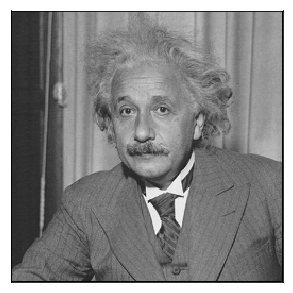

In [31]:
im = np.array(Image.open('/home/billbrod/Documents/pyrtools/DATA/einsteinCorrect.pgm'))

fig = plt.figure(figsize=(5,5))
ax = sfp.plotting.im_plot(im)

In [34]:
pyr = pt.pyramids.LaplacianPyramid(im, height=7)


In [36]:
pyr.pyr_size

{(0, 0): (256, 256),
 (1, 0): (128, 128),
 (2, 0): (64, 64),
 (3, 0): (32, 32),
 (4, 0): (16, 16),
 (5, 0): (8, 8),
 (6, 0): (4, 4)}

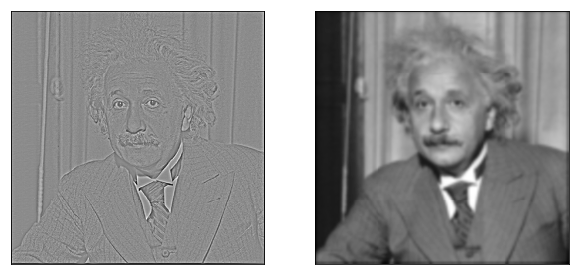

In [38]:
ims = [pyr.pyr_coeffs[(0,0)], pyr.recon_pyr(levels=range(1,7))]
fig, axes = plt.subplots(1,2, figsize=(10,5))
for i, ax in enumerate(axes.flatten()):
    sfp.plotting.im_plot(ims[i], ax=ax)

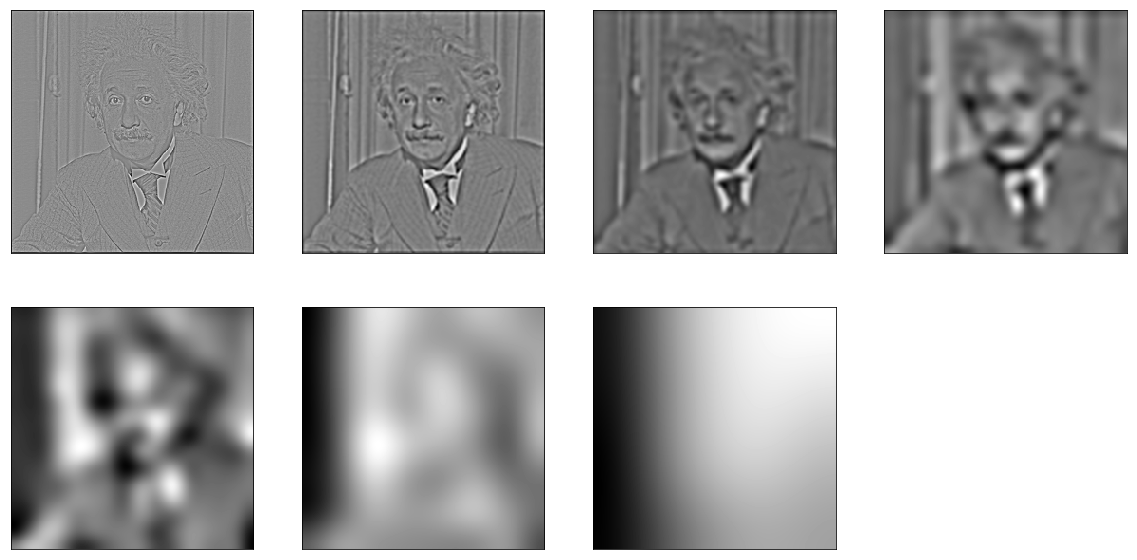

In [40]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))
ims = []
for i, ax in enumerate(axes.flatten()):
    if i < pyr.num_scales:
        ims.append(ndimage.zoom(pyr.pyr_coeffs[(i, 0)], 2**i)/float(2**i))
        sfp.plotting.im_plot(ims[-1], ax=ax)
    else:
        ax.set_visible(False)


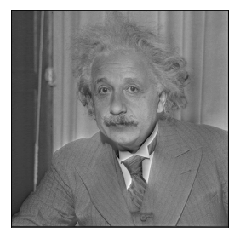

In [41]:
ims = np.array(ims)
# this doesn't quite work because the scaling is off, but it's close. reconPyr will do it exactly.
sfp.plotting.im_plot(ims.sum(0))

## Cells as filter examples

This creates a couple of figures showing windowed views of an image, to help illustrate what it might look like with cells acting as filters on an input image.

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
from scipy import ndimage
import sys
sys.path.append('..')
import sfp
from scipy.ndimage import filters as sfilts
import seaborn as sns

(256, 256)


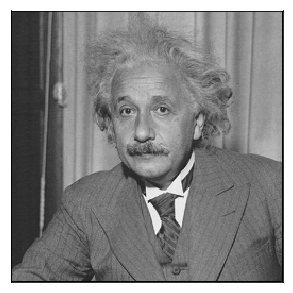

In [24]:
im = np.array(Image.open('/home/billbrod/Documents/pyrtools/DATA/einsteinCorrect.pgm'))
print(im.shape)

fig = plt.figure(figsize=(5,5))
ax = sfp.plotting.im_plot(im)

In [25]:
def create_circle_mask(x, y, rad, size):
    x_grid = np.array(range(size))
    x_grid, y_grid = np.meshgrid(x_grid, x_grid)
    mask = np.zeros((size, size))
    mask[(x_grid - x)**2 + (y_grid - y)**2 <= rad**2] = 1
    return mask

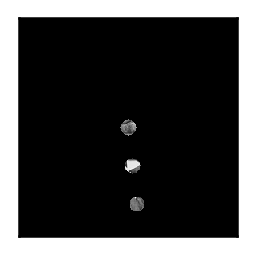

In [26]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128+i*5, 128+i*45, 9, 256)
    tmp = im*mask
    cells_view.append(tmp)
with sns.plotting_context('poster'):
    sfp.plotting.im_plot(np.array(cells_view).sum(0))
#    plt.savefig('Cells_no_change.svg', bbox_inches='tight')

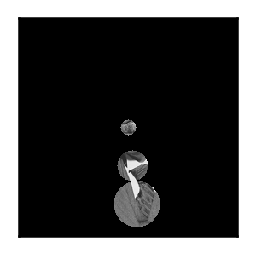

In [27]:
cells_view = []
for i in range(3):
    mask = create_circle_mask(128+i*5, 128+i*45, 9*(i+1), 256)
    tmp = im*mask
    cells_view.append(tmp)

with sns.plotting_context('poster'):
    sfp.plotting.im_plot(np.array(cells_view).sum(0))
#    plt.savefig('Cells_size_scale.svg', bbox_inches='tight')